In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import py_wake
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math


from py_wake.wind_farm_models import All2AllIterative

from py_wake.deficit_models.no_wake import NoWakeDeficit
from py_wake.site._site import UniformSite
from py_wake.flow_map import XYGrid

from py_wake.turbulence_models import CrespoHernandez
from py_wake.turbulence_models import GCLTurbulence
from py_wake.deficit_models import Rathmann
from py_wake.utils.plotting import setup_plot

from py_wake.site import UniformWeibullSite


from py_wake.wind_turbines.generic_wind_turbines import GenericWindTurbine

from py_wake.deficit_models.gaussian import BlondelSuperGaussianDeficit2020
from py_wake.literature.gaussian_models import Blondel_Cathelain_2020




In [2]:

optimized_params_4_xy=np.loadtxt('200_baseline_4ms_params_newpow.txt')
optimized_params_5_xy=np.loadtxt('200_baseline_5ms_params_newpow.txt')
optimized_params_6_xy=np.loadtxt('200_baseline_6ms_params_newpow.txt')
optimized_params_7_xy=np.loadtxt('200_baseline_7ms_params_newpow.txt')
optimized_params_8_xy=np.loadtxt('200_baseline_8ms_params_newpow.txt')
optimized_params_9_xy=np.loadtxt('200_baseline_9ms_params_newpow.txt')
optimized_params_10_xy=np.loadtxt('200_baseline_10ms_params_newpow.txt')
optimized_params_11_xy=np.loadtxt('200_baseline_11ms_params_newpow.txt')

In [3]:
#turbine parameters
D = 283.21 #rotor diameter
H=170 #hub height
Prated=22000 #kW

WD=270  #wind direction
WS=9 #wind speed
YD=0   #yaw direction
TI=0 #turbulence intensity


#site
site= UniformWeibullSite(p_wd=[0.03597152, 0.03948682, 0.05167394999999999, 0.07000154, 0.08364547,0.0643485,0.08643194,0.1177051,0.1515757, 0.14737920000000002, 0.1001205 , 0.1001205],  # sector frequencies
                               a=[9.176929, 9.782334, 9.531809,9.909545, 10.04269, 9.593921, 9.584007, 10.51499, 11.39895, 11.68746,11.63732,10.08803],          # Weibull scale parameter
                               k=[ 2.392578,2.447266,2.412109,2.591797, 2.755859, 2.595703, 2.583984,2.548828, 2.470703,2.607422, 2.626953, 2.326172],          # Weibull shape parameter
                               ti=TI                          # turbulence intensity, optional
                               )



from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
from py_wake.wind_turbines import WindTurbine, WindTurbines

u = [3, 3.54953237, 4.067900771, 4.553906848, 5.006427063, 5.424415288, 5.806905228, 6.153012649, 6.461937428, 6.732965398, 6.965470002, 7.158913742, 7.312849418, 7.426921164, 7.500865272, 7.534510799, 7.541241633, 7.58833327, 7.675676842, 7.803070431, 7.970219531, 8.176737731, 8.422147605, 8.70588182, 9.027284445, 9.385612468, 9.780037514, 10.20964776, 10.67345004, 11.17037214, 11.6992653, 11.78024073, 12.25890683, 12.84800295, 13.46519181, 14.10904661, 14.77807889, 15.470742, 16.18543466, 16.92050464, 17.67425264, 18.44493615, 19.23077353, 20.02994808, 20.8406123, 21.66089211, 22.4888912, 23.32269542, 24.1603772, 25]
ct =[0.909690244, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.855257296, 0.774101086, 0.720490763, 0.661132053, 0.604923382, 0.552299944, 0.503492823, 0.496594767, 0.425165695, 0.358673982, 0.305077335, 0.26106267, 0.224518543, 0.193961007, 0.168274803, 0.146592991, 0.128225018, 0.112613259, 0.099303406, 0.087922528, 0.078163937, 0.069768953, 0.062529458, 0.056267516, 0.050835688, 0.046110568]
power = [421.83074, 729.594626, 1098.194475, 1540.709041, 2047.160453, 2603.91616, 3194.496505, 3800.420277, 4402.064968, 4979.518503, 5513.399741, 5985.626199, 6380.108952, 6683.356762, 6884.973888, 6978.038832, 6996.756701, 7128.65163, 7377.653407, 7751.125765, 8259.981109, 8918.840694, 9746.232072, 10764.81338, 12001.61205, 13906.73209, 15575.33577, 17169.56425, 18707.56322, 20200.43536, 21753.12187,22000, 22000.00148, 22000.00035, 21999.95565, 22000.11877, 22000.06211, 22000.03476, 22000.02065, 22000.01266, 22000.00774,  22000.00451, 22000.00228, 22000.00079, 22000.35985, 21999.98, 22000.00104, 22000.00258, 22000.00476, 22000.00756]

windTurbines = WindTurbine(name='MyWT',
                    diameter=D,
                    hub_height=H,
                    powerCtFunction=PowerCtTabular(u,power,'kW',ct))


def get_velocity_field_xy(model=None, grid=XYGrid(x=np.linspace(0, 4400, 440), y=np.linspace(-1400 ,1400, 280), h=H)):
    wfm = All2AllIterative(site, windTurbines, wake_deficitModel=model,blockage_deficitModel=Rathmann(), turbulenceModel=GCLTurbulence())
    result = wfm(x=[0], y=[0], wd=WD, ws=WS, yaw=YD).flow_map(grid)
    return result.WS_eff.values.squeeze()


wf_model2=Blondel_Cathelain_2020(site,windTurbines,turbulenceModel=GCLTurbulence())
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

In [4]:

x_tilde=1/D * np.linspace(0, 4400, 440)
x_tilde_matrix = np.tile(x_tilde, (280, 1))


simulation_data_xy = np.loadtxt('200_baseline_9ms_xy.txt')
def objective_function_xy(params):
    b_s, c_s, b_f, c_f = params[0] ,params[1]  ,params[2]  ,params[3]  
    a_s=0
    model_cal = BlondelSuperGaussianDeficit2020(a_s=a_s, b_s=b_s, c_s=c_s, b_f=b_f, c_f=c_f)
    velocity_calibr_array = get_velocity_field_xy(model_cal).ravel()

    
    beta=0.5 * (1+np.sqrt(1-CT))/(np.sqrt(1-CT))
    sigma=(a_s *TI + b_s) * x_tilde_matrix.ravel() + c_s * np.sqrt(beta)
    n = 3.11 * np.exp(b_f * x_tilde) + c_f

    tot = np.average(abs(velocity_calibr_array -simulation_data_xy.ravel()))

    if math.isnan(tot):
        return 10**36

    else:
        if np.any(sigma < 0) or np.any(n < 2):
            return 10**36
        else:
            return tot







'error_xy=objective_function_xy(optimized_params_xy)\nerror_xz=objective_function_xz(optimized_params_xz)\nerror_xy_in_xz=objective_function_xz(optimized_params_xy)\nerror_xz_in_xy=objective_function_xy(optimized_params_xz)\n\npercentage_xy= abs(error_xy-error_xz_in_xy)/error_xy*100\npercentage_xz= abs(error_xz-error_xy_in_xz)/error_xz*100'

In [5]:
velocities=[4,5,6,7,8,9,10,11]


ks_xy=[optimized_params_4_xy[0],optimized_params_5_xy[0],optimized_params_6_xy[0],optimized_params_7_xy[0],optimized_params_8_xy[0],optimized_params_9_xy[0],optimized_params_10_xy[0],optimized_params_11_xy[0]]
cs_xy=[optimized_params_4_xy[1],optimized_params_5_xy[1],optimized_params_6_xy[1],optimized_params_7_xy[1],optimized_params_8_xy[1],optimized_params_9_xy[1],optimized_params_10_xy[1],optimized_params_11_xy[1]]
bf_xy=[optimized_params_4_xy[2],optimized_params_5_xy[2],optimized_params_6_xy[2],optimized_params_7_xy[2],optimized_params_8_xy[2],optimized_params_9_xy[2],optimized_params_10_xy[2],optimized_params_11_xy[2]]
cf_xy=[optimized_params_4_xy[3],optimized_params_5_xy[3],optimized_params_6_xy[3],optimized_params_7_xy[3],optimized_params_8_xy[3],optimized_params_9_xy[3],optimized_params_10_xy[3],optimized_params_11_xy[3]]

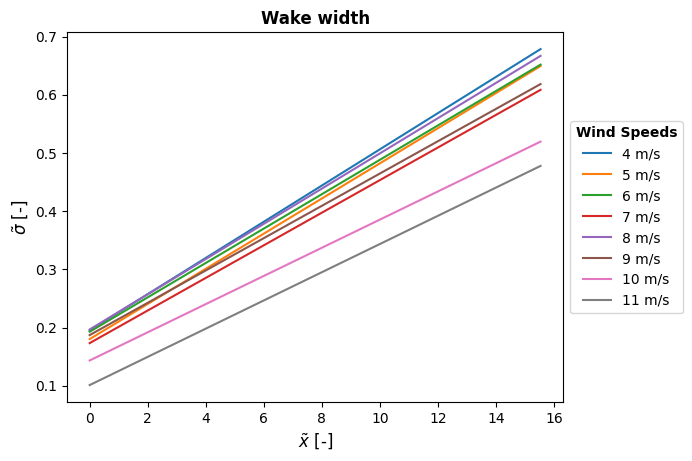

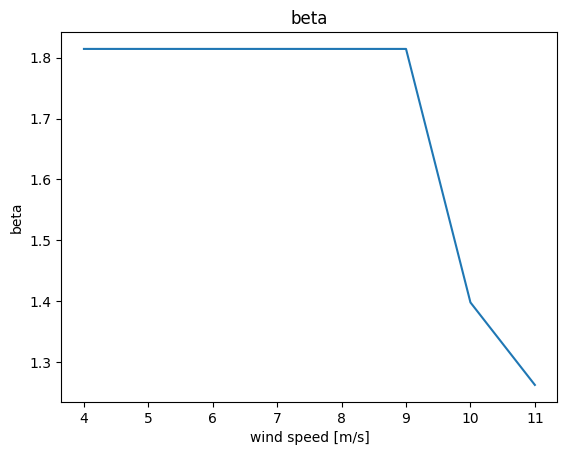

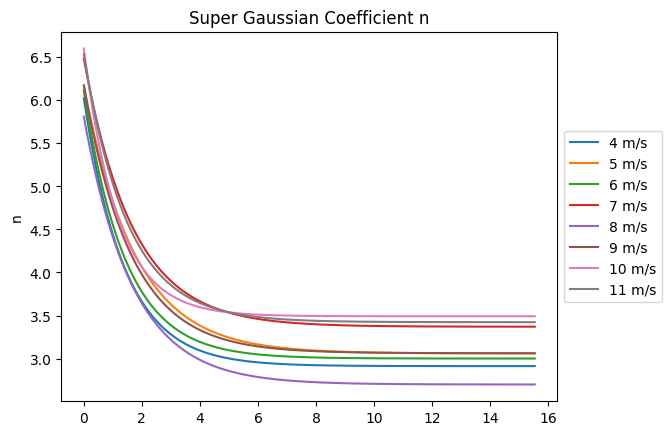

C:\Users\asus\AppData\Local\Temp\ipykernel_19428\1277891125.py:143: RuntimeWarning: invalid value encountered in sqrt
  C4=2**(2/n4-1)-np.sqrt(2**(4/n4-2)-(n4*CT4)/(16*agamma(2/n4)*np.sign(sigma_4)*np.abs(sigma_4)**(4/n4)))
C:\Users\asus\AppData\Local\Temp\ipykernel_19428\1277891125.py:145: RuntimeWarning: invalid value encountered in sqrt
  C6=2**(2/n6-1)-np.sqrt(2**(4/n6-2)-(n6*CT6)/(16*agamma(2/n6)*np.sign(sigma_6)*np.abs(sigma_6)**(4/n6)))
C:\Users\asus\AppData\Local\Temp\ipykernel_19428\1277891125.py:147: RuntimeWarning: invalid value encountered in sqrt
  C8=2**(2/n8-1)-np.sqrt(2**(4/n8-2)-(n8*CT8)/(16*agamma(2/n8)*np.sign(sigma_8)*np.abs(sigma_8)**(4/n8)))


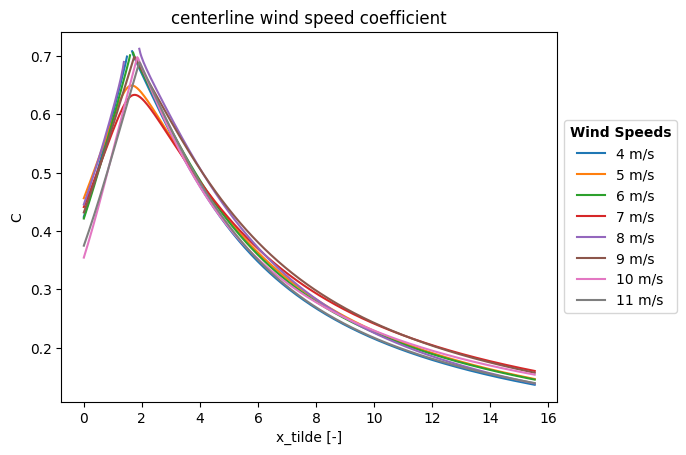

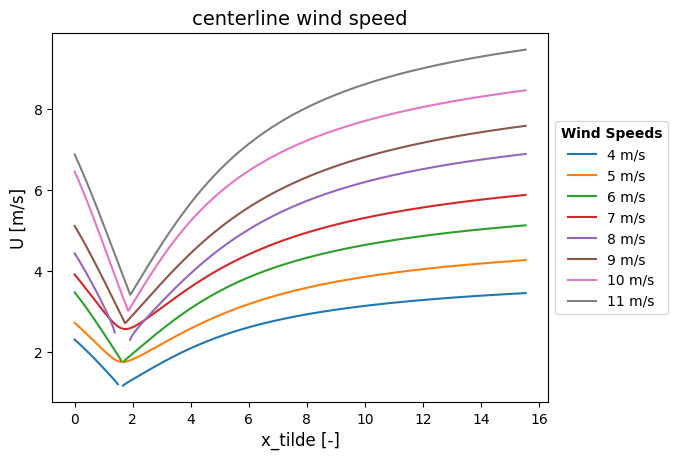

In [6]:
x_tilde=1/D * np.linspace(0, 4400, 440)
x_tilde_matrix = np.tile(x_tilde, (280, 1))


WS=4
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT4=sim_res.CT.values.squeeze()
beta4=0.5 * (1+np.sqrt(1-CT4))/(np.sqrt(1-CT4))
sigma_4= ks_xy[0]*x_tilde_matrix[0]+cs_xy[0]*np.sqrt(beta4)
WS=5
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT5=sim_res.CT.values.squeeze()
beta5=0.5 * (1+np.sqrt(1-CT5))/(np.sqrt(1-CT5))
sigma_5= ks_xy[1]*x_tilde_matrix[0]+cs_xy[1]*np.sqrt(beta5)
WS=6
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT6=sim_res.CT.values.squeeze()
beta6=0.5 * (1+np.sqrt(1-CT6))/(np.sqrt(1-CT6))
sigma_6= ks_xy[2]*x_tilde_matrix[0]+cs_xy[2]*np.sqrt(beta6)
WS=7
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT7=sim_res.CT.values.squeeze()
beta7=0.5 * (1+np.sqrt(1-CT7))/(np.sqrt(1-CT7))
sigma_7= ks_xy[3]*x_tilde_matrix[0]+cs_xy[3]*np.sqrt(beta7)
WS=8
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT8=sim_res.CT.values.squeeze()
beta8=0.5 * (1+np.sqrt(1-CT8))/(np.sqrt(1-CT8))
sigma_8= ks_xy[4]*x_tilde_matrix[0]+cs_xy[4]*np.sqrt(beta8)
WS=9
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT9=sim_res.CT.values.squeeze()
beta9=0.5 * (1+np.sqrt(1-CT9))/(np.sqrt(1-CT9))
sigma_9= ks_xy[5]*x_tilde_matrix[0]+cs_xy[5]*np.sqrt(beta9)
WS=10
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT10=sim_res.CT.values.squeeze()
beta10=0.5 * (1+np.sqrt(1-CT10))/(np.sqrt(1-CT10))
sigma_10= ks_xy[6]*x_tilde_matrix[0]+cs_xy[6]*np.sqrt(beta10)
WS=11
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT11=sim_res.CT.values.squeeze()
beta11=0.5 * (1+np.sqrt(1-CT11))/(np.sqrt(1-CT11))
sigma_11= ks_xy[7]*x_tilde_matrix[0]+cs_xy[7]*np.sqrt(beta11)

plt.plot(x_tilde_matrix[0], sigma_4,label='4 m/s')
plt.plot(x_tilde_matrix[0], sigma_5,label='5 m/s')
plt.plot(x_tilde_matrix[0], sigma_6,label='6 m/s')
plt.plot(x_tilde_matrix[0], sigma_7,label='7 m/s')
plt.plot(x_tilde_matrix[0], sigma_8,label='8 m/s')
plt.plot(x_tilde_matrix[0], sigma_9,label='9 m/s')
plt.plot(x_tilde_matrix[0], sigma_10,label='10 m/s')
plt.plot(x_tilde_matrix[0], sigma_11,label='11 m/s')
plt.xlabel(r'$\tilde{x}$ [-]',fontsize=12)
plt.ylabel(r'$\tilde{\sigma}$ [-]',fontsize=12)
plt.title('Wake width',fontsize=12,fontweight='bold')
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Wind Speeds')
plt.setp(legend.get_title(), fontweight='bold')  # Make the legend title bold

output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_wakeWidth.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()



plt.plot([4,5,6,7,8,9,10,11], [beta4,beta5,beta6,beta7,beta8,beta9,beta10,beta11])
plt.xlabel('wind speed [m/s]')
plt.ylabel('beta')
plt.title('beta')
plt.show()

n4=3.11*np.exp(bf_xy[0]*x_tilde_matrix[0])+cf_xy[0]
n5=3.11*np.exp(bf_xy[1]*x_tilde_matrix[0])+cf_xy[1]
n6=3.11*np.exp(bf_xy[2]*x_tilde_matrix[0])+cf_xy[2]
n7=3.11*np.exp(bf_xy[3]*x_tilde_matrix[0])+cf_xy[3]
n8=3.11*np.exp(bf_xy[4]*x_tilde_matrix[0])+cf_xy[4]
n9=3.11*np.exp(bf_xy[5]*x_tilde_matrix[0])+cf_xy[5]
n10=3.11*np.exp(bf_xy[6]*x_tilde_matrix[0])+cf_xy[6]
n11=3.11*np.exp(bf_xy[7]*x_tilde_matrix[0])+cf_xy[7]
plt.plot(x_tilde_matrix[0], n4,label='4 m/s')
plt.plot(x_tilde_matrix[0], n5,label='5 m/s')
plt.plot(x_tilde_matrix[0], n6,label='6 m/s')
plt.plot(x_tilde_matrix[0], n7,label='7 m/s')
plt.plot(x_tilde_matrix[0], n8,label='8 m/s')
plt.plot(x_tilde_matrix[0], n9,label='9 m/s')
plt.plot(x_tilde_matrix[0], n10,label='10 m/s')
plt.plot(x_tilde_matrix[0], n11,label='11 m/s')
plt.xlabel('')
plt.ylabel('n')
plt.title('Super Gaussian Coefficient n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

from autograd.scipy.special import gamma as agamma
C4=2**(2/n4-1)-np.sqrt(2**(4/n4-2)-(n4*CT4)/(16*agamma(2/n4)*np.sign(sigma_4)*np.abs(sigma_4)**(4/n4)))
C5=2**(2/n5-1)-np.sqrt(2**(4/n5-2)-(n5*CT5)/(16*agamma(2/n5)*np.sign(sigma_5)*np.abs(sigma_5)**(4/n5)))
C6=2**(2/n6-1)-np.sqrt(2**(4/n6-2)-(n6*CT6)/(16*agamma(2/n6)*np.sign(sigma_6)*np.abs(sigma_6)**(4/n6)))
C7=2**(2/n7-1)-np.sqrt(2**(4/n7-2)-(n7*CT7)/(16*agamma(2/n7)*np.sign(sigma_7)*np.abs(sigma_7)**(4/n7)))
C8=2**(2/n8-1)-np.sqrt(2**(4/n8-2)-(n8*CT8)/(16*agamma(2/n8)*np.sign(sigma_8)*np.abs(sigma_8)**(4/n8)))
C9=2**(2/n9-1)-np.sqrt(2**(4/n9-2)-(n9*CT9)/(16*agamma(2/n9)*np.sign(sigma_9)*np.abs(sigma_9)**(4/n9)))
C10=2**(2/n10-1)-np.sqrt(2**(4/n10-2)-(n10*CT10)/(16*agamma(2/n10)*np.sign(sigma_10)*np.abs(sigma_10)**(4/n10)))
C11=2**(2/n11-1)-np.sqrt(2**(4/n11-2)-(n11*CT11)/(16*agamma(2/n11)*np.sign(sigma_11)*np.abs(sigma_11)**(4/n11)))
plt.plot(x_tilde_matrix[0], C4,label='4 m/s')
plt.plot(x_tilde_matrix[0], C5,label='5 m/s')
plt.plot(x_tilde_matrix[0], C6,label='6 m/s')
plt.plot(x_tilde_matrix[0], C7,label='7 m/s')
plt.plot(x_tilde_matrix[0], C8,label='8 m/s')
plt.plot(x_tilde_matrix[0], C9,label='9 m/s')
plt.plot(x_tilde_matrix[0], C10,label='10 m/s')
plt.plot(x_tilde_matrix[0], C11,label='11 m/s')
plt.xlabel('x_tilde [-]')
plt.ylabel('C')
plt.title('centerline wind speed coefficient')
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Wind Speeds')
plt.setp(legend.get_title(), fontweight='bold')  # Make the legend title bold


plt.show()

W4=4-4*C4
W5=5-5*C5
W6=6-6*C6
W7=7-7*C7
W8=8-8*C8
W9=9-9*C9
W10=10-10*C10
W11=11-11*C11
plt.plot(x_tilde_matrix[0], W4,label='4 m/s')
plt.plot(x_tilde_matrix[0], W5,label='5 m/s')
plt.plot(x_tilde_matrix[0], W6,label='6 m/s')
plt.plot(x_tilde_matrix[0], W7,label='7 m/s')
plt.plot(x_tilde_matrix[0], W8,label='8 m/s')
plt.plot(x_tilde_matrix[0], W9,label='9 m/s')
plt.plot(x_tilde_matrix[0], W10,label='10 m/s')
plt.plot(x_tilde_matrix[0], W11,label='11 m/s')
plt.xlabel('x_tilde [-]',fontsize=12)
plt.ylabel('U [m/s]',fontsize=12)
plt.title('centerline wind speed',fontsize=14)
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Wind Speeds')
plt.setp(legend.get_title(), fontweight='bold')  # Make the legend title bold

plt.show()

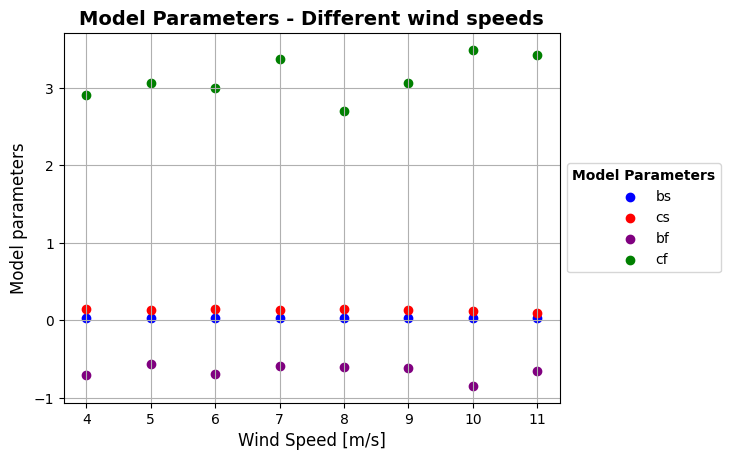

In [25]:

plt.scatter(velocities, ks_xy, color='blue', label='bs', marker='o')
plt.scatter(velocities, cs_xy, color='red', label='cs', marker='o')
plt.scatter(velocities, bf_xy, color='purple', label='bf', marker='o')
plt.scatter(velocities, cf_xy, color='green', label='cf', marker='o')


# Add labels and title
plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('Model parameters',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')

# Add legend
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Model Parameters')
plt.setp(legend.get_title(), fontweight='bold')  # Make the legend title bold
plt.grid(True)
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds.png'
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

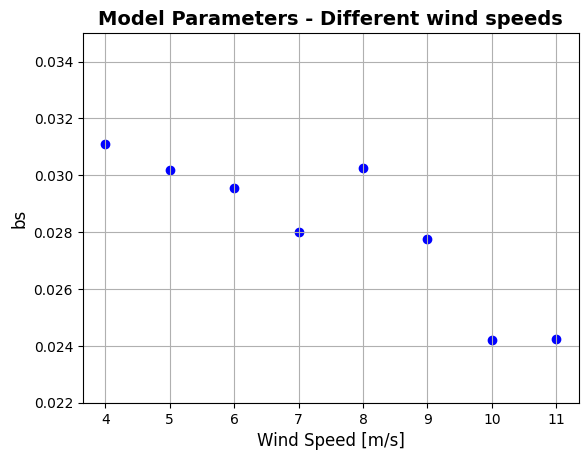

In [14]:
plt.scatter(velocities, ks_xy, color='blue', label='bs', marker='o')


# Add labels and title
plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('bs',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')
plt.ylim([0.022,0.035])
plt.grid(True)
# Display the plot
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_ks.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

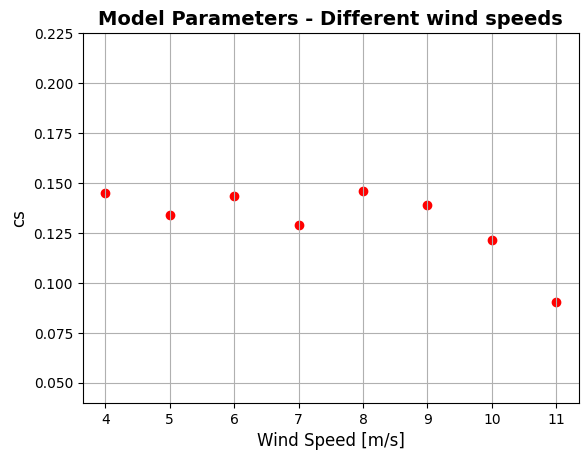

In [15]:

plt.scatter(velocities, cs_xy, color='red', label='cs', marker='o')

plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('cs',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')
plt.grid(True)
plt.ylim([0.04,0.225])
# Display the plot
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_cs.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

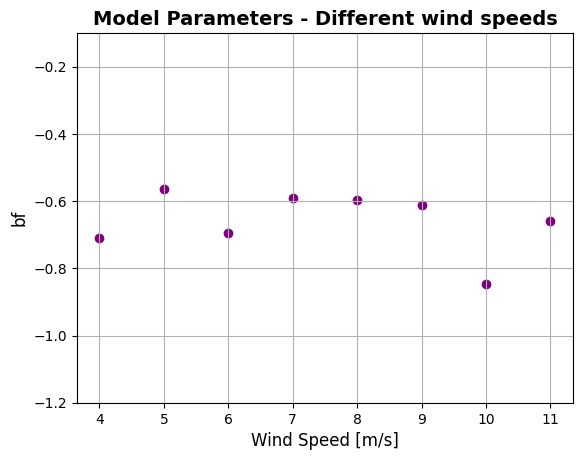

In [16]:
plt.scatter(velocities, bf_xy, color='purple', label='cs', marker='o')

plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('bf',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')
plt.grid(True)
plt.ylim(-1.2,-0.1)
# Display the plot
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_bf.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

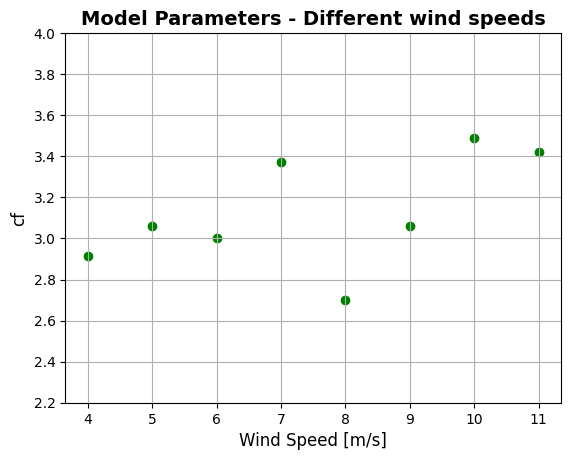

In [17]:
plt.scatter(velocities, cf_xy, color='green', label='cs', marker='o')

plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('cf',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')
plt.grid(True)
plt.ylim([2.2,4])
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_cf.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

ERROR USING 4 MS WIND SPEED PARAMETERS

In [7]:
#4 ms - used as a comparison for other wind speeds

WS=4
simulation_data_xy = np.loadtxt('200_baseline_4ms_xy.txt')
optimized_params_4_xy=np.loadtxt('200_baseline_4ms_xy_params_newconfig.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_4ms=objective_function_xy(optimized_params_4_xy)




#trying with 5 ms
WS=5
simulation_data_xy = np.loadtxt('200_baseline_5ms_xy.txt')
optimized_params_5_xy=np.loadtxt('200_baseline_5ms_xy_params_newconfig.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_5ms_in4=objective_function_xy(optimized_params_4_xy)
result_5ms=objective_function_xy(optimized_params_5_xy)
percentage_error_5ms=np.abs(result_5ms-result_5ms_in4)/result_5ms*100


#trying with 6 ms
WS=6
simulation_data_xy = np.loadtxt('200_baseline_6ms_xy.txt')
optimized_params_6_xy=np.loadtxt('200_baseline_6ms_xy_params_newconfig.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_6ms_in4=objective_function_xy(optimized_params_4_xy)
result_6ms=objective_function_xy(optimized_params_6_xy)
percentage_error_6ms=np.abs(result_6ms-result_6ms_in4)/result_6ms*100


#trying with 7 ms
WS=7
simulation_data_xy = np.loadtxt('200_baseline_7ms_xy.txt')
optimized_params_7_xy=np.loadtxt('200_baseline_7ms_xy_params_newconfig3.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_7ms_in4=objective_function_xy(optimized_params_4_xy)
result_7ms=objective_function_xy(optimized_params_7_xy)
percentage_error_7ms=np.abs(result_7ms-result_7ms_in4)/result_7ms*100


#trying with 8 ms
WS=8
simulation_data_xy = np.loadtxt('200_baseline_8ms_xy.txt')
optimized_params_8_xy=np.loadtxt('200_baseline_8ms_xy_params_newconfig.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_8ms_in4=objective_function_xy(optimized_params_4_xy)
result_8ms=objective_function_xy(optimized_params_8_xy)
percentage_error_8ms=np.abs(result_8ms-result_8ms_in4)/result_8ms*100


#trying with 9 ms
WS=9
simulation_data_xy = np.loadtxt('200_baseline_9ms_xy.txt')
optimized_params_9_xy=np.loadtxt('200_baseline_9ms_xy_params_newconfig2.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_9ms_in4=objective_function_xy(optimized_params_4_xy)
result_9ms=objective_function_xy(optimized_params_9_xy)
percentage_error_9ms=np.abs(result_9ms-result_9ms_in4)/result_9ms*100


#trying with 10 ms
WS=10
simulation_data_xy = np.loadtxt('200_baseline_10ms_xy.txt')
optimized_params_10_xy=np.loadtxt('200_baseline_10ms_xy_params_newconfig2.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_10ms_in4=objective_function_xy(optimized_params_4_xy)
result_10ms=objective_function_xy(optimized_params_10_xy)
percentage_error_10ms=np.abs(result_10ms-result_10ms_in4)/result_10ms*100


#trying with 11 ms
WS=11
simulation_data_xy = np.loadtxt('200_baseline_11ms_xy.txt')
optimized_params_11_xy=np.loadtxt('200_baseline_11ms_xy_params_newconfig2.txt')
sim_res = wf_model2(x=[0], y=[0],     # wind turbine positions
                   h=H,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=WD,  # Wind direction
                   ws=WS,  # Wind speed
                  )

CT=sim_res.CT.values.squeeze()

result_11ms_in4=objective_function_xy(optimized_params_4_xy)
result_11ms=objective_function_xy(optimized_params_11_xy)
percentage_error_11ms=np.abs(result_11ms-result_11ms_in4)/result_11ms*100

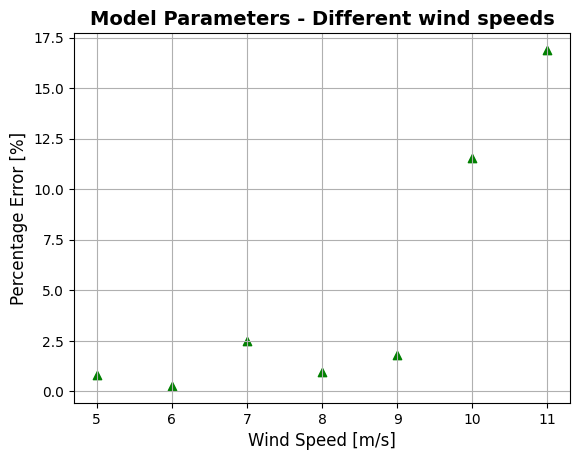

In [21]:
velocities_p=[5,6,7,8,9,10,11]
errors=[percentage_error_5ms,percentage_error_6ms,percentage_error_7ms,percentage_error_8ms,percentage_error_9ms,percentage_error_10ms,percentage_error_11ms]
plt.scatter(velocities_p, errors, color='green', label='cs',marker='^')

plt.xlabel('Wind Speed [m/s]',fontsize=12)
plt.ylabel('Percentage Error [%]',fontsize=12)
plt.title('Model Parameters - Different wind speeds',fontsize=14,fontweight='bold')
plt.grid(True)
output_path = r'C:\Users\asus\Desktop\Delft\THESIS\REPORT\IMAGES REPORT\6_different_wind_speeds_error.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()